# Customer Churn Prediction 

## Introduction

### Importing libraries

In [58]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

Dataset

In [59]:
telco = pd.read_csv('./data/telco_churn_data.csv')

In [60]:
pd.set_option('display.max_columns', None)
telco.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


1. **Customer ID:** A unique ID that identifies each customer
2. **Referred a Friend:** Indicates if the customer has ever referred a friend or family member to this company
3. **Number of Referrals:** Indicates the number of referrals to date that the customer has made
4. **Tenure in Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified
5. **Offer:** Identifies the last marketing offer that the customer accepted, if applicable
6. **Phone Service:** Indicates if the customer subscribes to home phone service with the company
7. **Avg Monthly Long Distance Charges:** Indicates the customer’s average long distance charges, calculated to the end of the quarter
8. **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company
9. **Internet Service:** Indicates if the customer subscribes to Internet service with the company
10. **Internet Type:** Indicates the type of Internet service the customer subscribes
11. **Avg Monthly GB Download:** Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter
12. **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company
13. **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company
14. **Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment
15. **Premium Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced
16. **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider
17. **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider
18. **Streaming Music:** Indicates if the customer uses their Internet service to stream music from a third party provider
19. **Unlimited Data:** Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads
20. **Contract:** Indicates the customer’s current contract type
21. **Paperless Billing:** Indicates if the customer has chosen paperless billing
22. **Payment Method:** Indicates how the customer pays their bill
23. **Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company
24. **Total Regular Charges:** Indicates the customer’s total regular charges, excluding additional charges
25. **Total Refunds:** Indicates the customer’s total refunds
26. **Total Extra Data Charges:** Indicates the customer’s total charges for extra data downloads above those specified in their plan
27. **Total Long Distance Charges:** Total charges for long distance calls
28. **Gender:** The customer’s gender
29. **Age:** The customer’s current age
30. **Under 30:** Indicates if the customer is under 30 years old
31. **Senior Citizen:** Indicates if the customer is 65 or older
32. **Married:** Indicates if the customer is married
33. **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents,
34. **Number of Dependents:** Indicates the number of dependents that live with the customer
35. **City:** The city of the customer’s primary residence
36. **Zip Code:** The zip code of the customer’s primary residence
37. **Latitude:** The latitude of the customer’s primary residence
38. **Longitude:** The longitude of the customer’s primary residence
39. **Population:** A current population estimate for the entire Zip Code area
40. **Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company
41. **CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data.
42. **Churn Category:** A high-level category for the customer’s reason for churning
43. **Churn Reason:** A customer’s specific reason for leaving the company
44. **Total Customer Svc Requests:** Number of times the customer contacted customer service in the past quarter
45. **Product/Service Issues Reported:** Number of times the customer reported an issue with a product or service in the past quarter
46. **Customer Satisfaction:** A customer’s overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied)

## Dataset Exploration

In [61]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

Treating Duplicated and Missing Values

In [62]:
missing_values = telco.isna().sum()

# Filtra las columnas con valores faltantes (mayores que cero)
columns_with_missing_values = missing_values[missing_values > 0]

# Imprime la cantidad de valores faltantes en las columnas con valores faltantes
print("Cantidad de valores faltantes por columna:")
print(columns_with_missing_values)


Cantidad de valores faltantes por columna:
Churn Category           5174
Churn Reason             5174
Customer Satisfaction    5209
dtype: int64


Before dropping these columns, it's essential to assess whether they are genuinely unnecessary for your analysis or if there are alternative ways to handle the missing data. 

In [63]:
unique_values_churn_category = telco['Churn Category'].unique()
unique_values_churn_reason = telco['Churn Reason'].unique()
unique_values_customer_satisfaction = telco['Customer Satisfaction'].unique()

print("Unique values in Churn Category:")
print(unique_values_churn_category)

print("\nUnique values in Churn Reason:")
print(unique_values_churn_reason)

print("\nUnique values in Customer Satisfaction:")
print(unique_values_customer_satisfaction)


Unique values in Churn Category:
['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]

Unique values in Churn Reason:
['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' nan 'Lack of self-service on Website']

Unique values in Customer Satisfaction:
[nan  2.  1.  3.  5.  4.]


While these columns contain valuable information for analysis, the presence of a substantial number of missing values poses a significant challenge. Attempting to impute missing data is not a feasible option as it may lead to inaccuracies by fabricating data.

In [64]:
telco = telco.drop(['Churn Category', 'Churn Reason', 'Customer Satisfaction'], axis=1)


Duplicated values

In [65]:
print('Number of duplicated values in training dataset: ', telco.duplicated().sum())

Number of duplicated values in training dataset:  0


In [66]:
columns_to_drop = ['Under 30', 'Referred a Friend']
telco.drop(columns=columns_to_drop, inplace=True)


We get rid of these variables beacause they are redundant and can be explained with other variables

### Basic Statistics

In [67]:
telco.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000


Conclusions

1. **Number of Referrals:** The "Number of Referrals" column has an average of approximately 1.95, suggesting that, on average, customers have made a moderate number of referrals. The minimum value is 0, indicating that some customers have not made any referrals.

2. **Tenure in Months:** The average tenure of customers is around 32.39 months. The range of tenure varies from 1 month to 72 months. This provides information about the duration of the relationship with customers.

3. **Average Monthly Charges:** The average monthly charge is approximately $65.54, with a range from $18.25 to $123.08. This indicates the variability in monthly charges among customers.

4. **Age:** The average age of customers is approximately 46.51 years, with a standard deviation of around 16.75. The age range varies from 19 years to 80 years.

5. **Number of Dependents:** Most customers have 0 dependents, as observed in the 75th percentile, but the range of this variable goes from 0 to 9. This indicates that some customers have a significant number of dependents.

6. **Churn Value:** Approximately 26.54% of customers have a churn value of 1, indicating they have churned the service, while 73.46% have a churn value of 0, suggesting they are still customers.

### Data imbalance

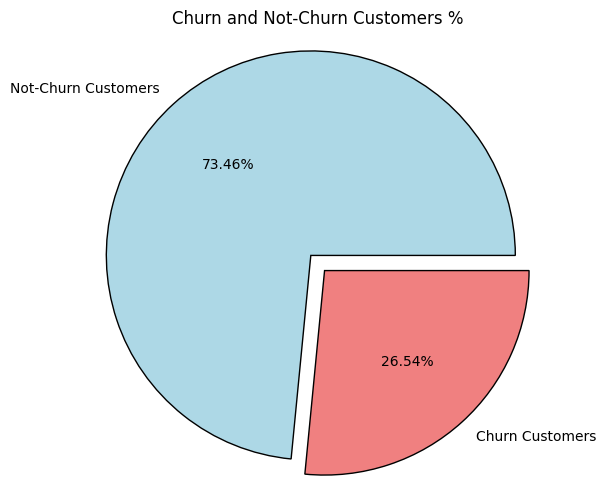

In [68]:
# Calcular la proporción de 0 y 1 en Churn Value
churn_proportions = telco['Churn Value'].value_counts(normalize=True)

# Etiquetas y colores
labels = ['Not-Churn Customers', 'Churn Customers']
colors = ['lightblue', 'lightcoral']

# Opciones adicionales
explode = (0.1, 0)
wedgeprops = {'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(churn_proportions, labels=labels, autopct='%1.2f%%', colors=colors, explode=explode, wedgeprops=wedgeprops)
plt.title('Churn and Not-Churn Customers %')

# Mostrar el gráfico
plt.axis('equal')  # Aspecto igual para que sea un círculo
plt.show()


### Importance of Metrics

- The goal is to avoid misclassifying a churned customer as non-churned, as this could lead to missed opportunities for churn prevention.
- Incorrectly labeling a non-churned customer as churning may not harm the customer but would result in unnecessary resource allocation.
- Accepting a certain degree of this situation is possible if it helps accurately identify churned customers.
- The primary objective is to minimize false negatives, where a churning customer is mistakenly categorized as non-churning.
- False positives, which involve identifying a non-churning customer as churning, are less critical since they do not negatively impact the customer, even though they require extra effort.

The most suitable metrics are:

**Recall:** the ability of a model to find all the relevant cases within a data set.
**ROC-AUC:** ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

## EDA

### Numerical Columns

C:\Users\river\AppData\Local\Temp\ipykernel_21736\4250908608.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = telco.corr()


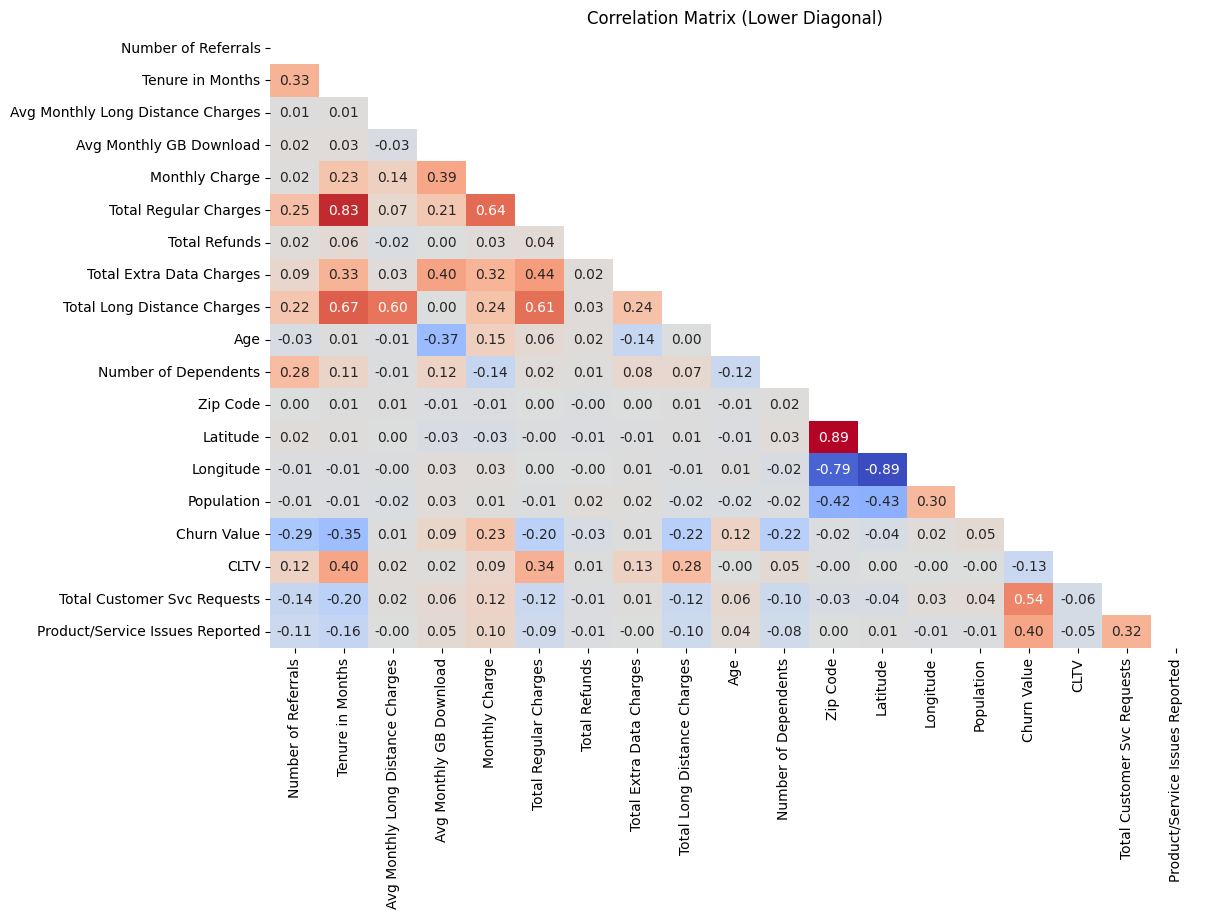

In [69]:
import numpy as np

# Calcular la matriz de correlación de Pearson
correlation_matrix = telco.corr()

# Crear una máscara para seleccionar la diagonal inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el mapa de calor de la matriz de correlación con la diagonal inferior en blanco
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)

# Configurar el título
plt.title("Correlation Matrix (Lower Diagonal)")

# Mostrar el mapa de calor
plt.show()


### Distributions

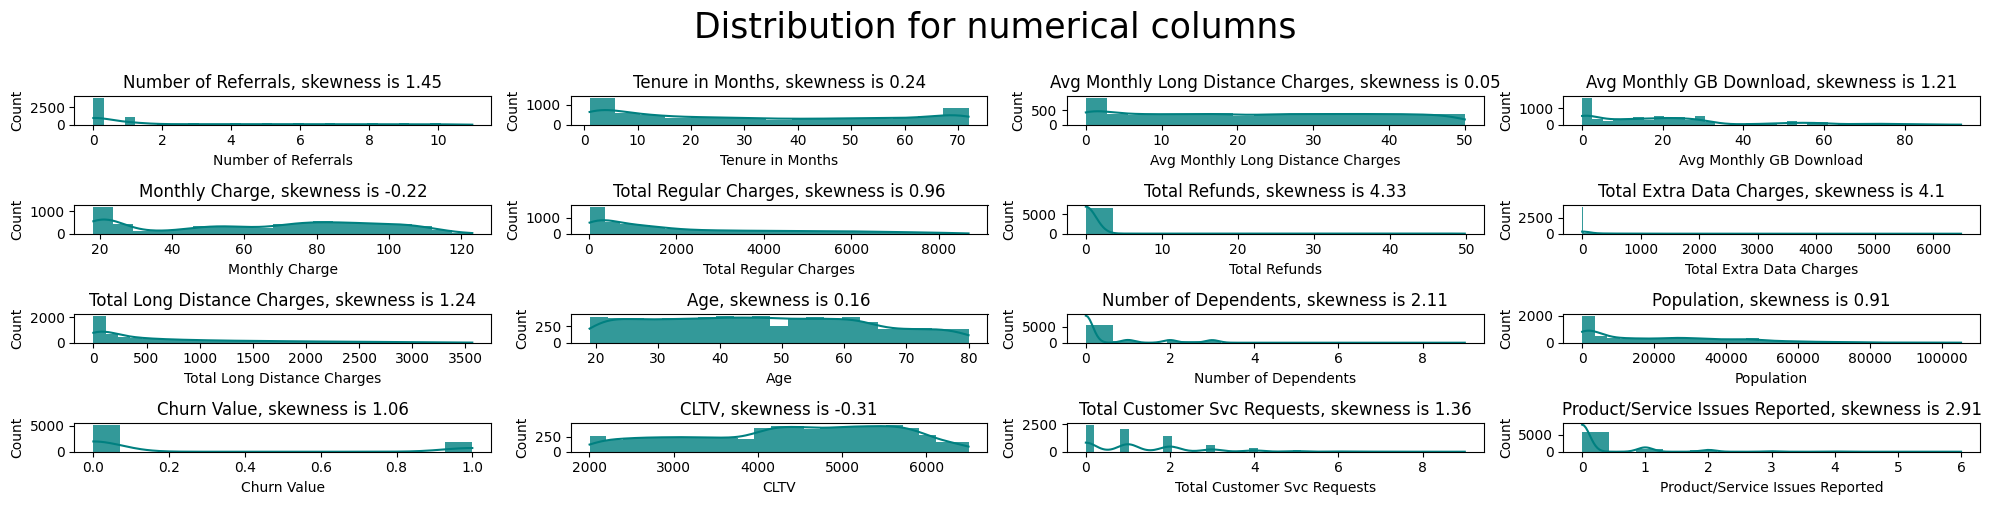

In [70]:
# Selecciona las columnas específicas
interest_columns = [
    'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
    'Avg Monthly GB Download', 'Monthly Charge', 'Total Regular Charges',
    'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges',
    'Age', 'Number of Dependents', 'Population',
    'Churn Value', 'CLTV', 'Total Customer Svc Requests', 'Product/Service Issues Reported'
]

def dist_custom(dataset, columnas_interes, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 5))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()

    for i, data in enumerate(columnas_interes):
        sns.histplot(dataset[data], kde=True, ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

    plt.tight_layout()
    plt.show()

# Suponiendo que "telco" es tu DataFrame
dist_custom(dataset=telco, columnas_interes=interest_columns, rows=4, cols=4, suptitle='Distribution for numerical columns')


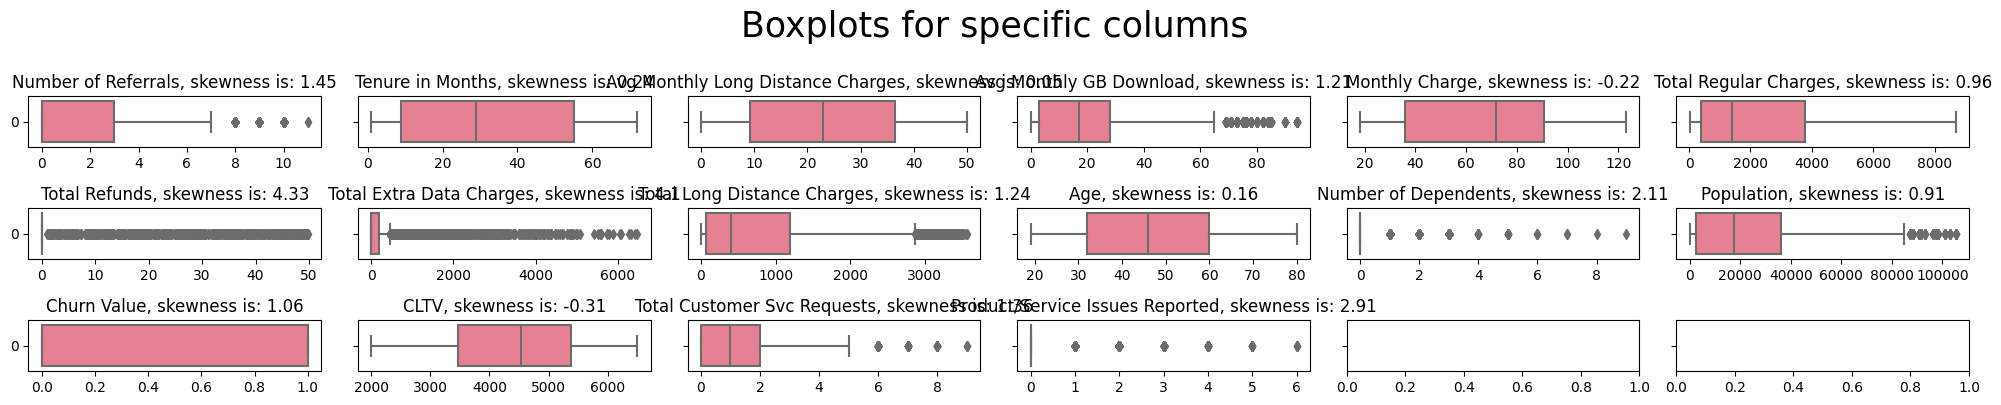

In [71]:


def boxplots_custom(dataset, interest_columns, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20, 4))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()

    for i, column in enumerate(interest_columns):
        skewness = round(dataset[column].skew(axis=0, skipna=True), 2)
        axs[i].set_title(f'{column}, skewness is: {skewness}')
        sns.boxplot(data=dataset[column], orient='h', ax=axs[i], palette='husl')

    plt.tight_layout()
    plt.show()

# Assuming "telco" is your DataFrame
boxplots_custom(dataset=telco, interest_columns=interest_columns, rows=3, cols=6, suptitle='Boxplots for specific columns')


## Treating Outliers

In data analysis, outliers are data points that deviate significantly from the majority of the dataset. Identifying and handling outliers is a crucial step in the data preprocessing pipeline.

Outliers can introduce bias, affect statistical measures, and have a substantial impact on the performance of predictive models.

This section will explore methods for detecting and addressing outliers in the Telco dataset, ensuring that our analysis and modeling processes yield more robust and reliable results.


**The Interquartile Range (IQR) is a widely employed method for detecting and removing outliers.**

The general guideline is that any data point falling outside the range defined by (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is considered an outlier and can be eliminated.


Procedure:

1. Determine the value of the first quartile, Q1.
2. Determine the value of the third quartile, Q3.
3. Calculate the IQR (Interquartile Range), where IQR = Q3 - Q1.
4. Establish the normal data range with the lower limit as Q1 - 1.5 IQR and the upper limit as Q3 + 1.5 IQR.

In [72]:
# Calculate the interquartile range (IQR) for each column of interest
Q1 = telco[interest_columns].quantile(0.25)
Q3 = telco[interest_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (telco[interest_columns] < lower_bound) | (telco[interest_columns] > upper_bound)

# Show the results
#print("Rows with outliers:")
#print(telco[outliers.any(axis=1)])

### Features VS Churn Value

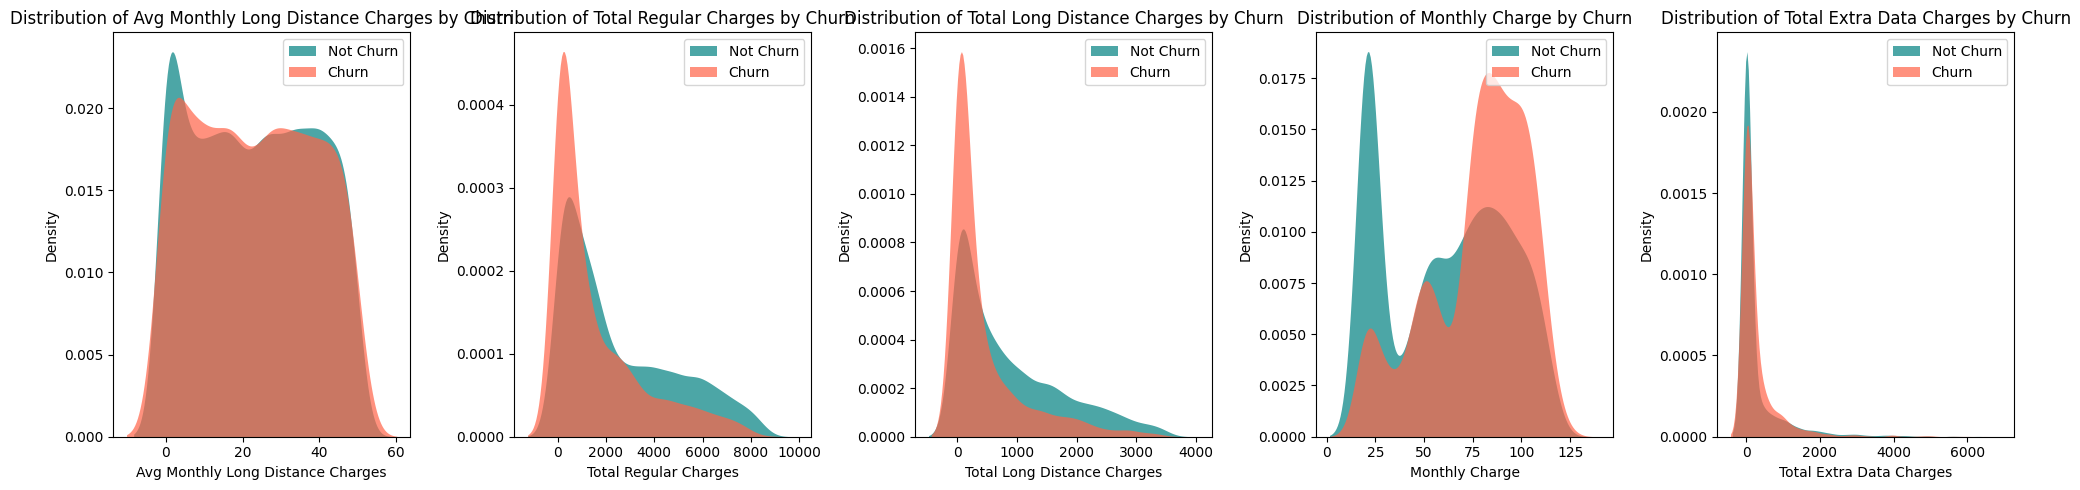

In [73]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

columns_of_interest = [
    'Avg Monthly Long Distance Charges', 'Total Regular Charges',
    'Total Long Distance Charges', 'Monthly Charge', 'Total Extra Data Charges'
]

colors = ['#008080', '#FF6347']

for i, column in enumerate(columns_of_interest):
    plt.subplot(1, 5, i + 1)
    ax = sns.kdeplot(telco[column][(telco["Churn Value"] == 0)], color=colors[0], fill=True, alpha=0.7, linewidth=0)
    ax = sns.kdeplot(telco[column][(telco["Churn Value"] == 1)], color=colors[1], fill=True, alpha=0.7, linewidth=0)
    ax.legend(["Not Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(column)
    ax.set_title(f'Distribution of {column} by Churn')

plt.tight_layout()
plt.show()


**Conclusions**

- Customers with higher monthly charges are more likely to churn

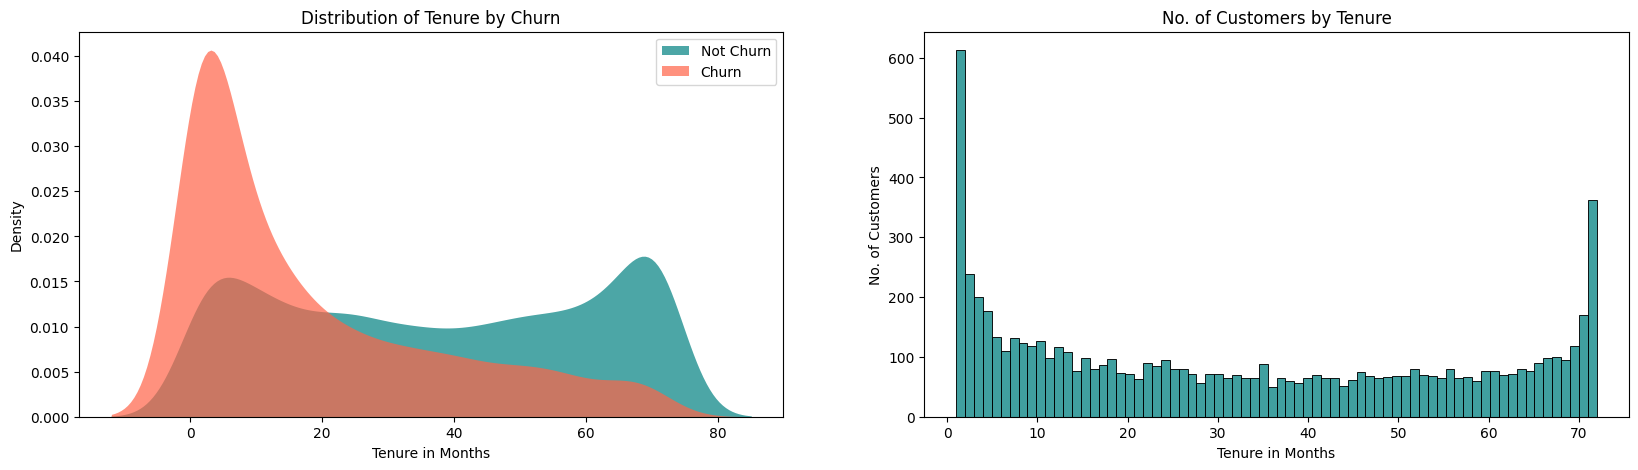

In [74]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Gráfico de distribución (KDE)
ax1 = sns.kdeplot(telco["Tenure in Months"][telco["Churn Value"] == 0], color='#008080', fill=True, alpha=0.7, linewidth=0, ax=ax1)
ax1 = sns.kdeplot(telco["Tenure in Months"][telco["Churn Value"] == 1], color='#FF6347', fill=True, alpha=0.7, linewidth=0, ax=ax1)
ax1.legend(["Not Churn", "Churn"], loc='upper right')
ax1.set_ylabel('Density')
ax1.set_xlabel('Tenure in Months')
ax1.set_title('Distribution of Tenure by Churn')

# Histograma
ax2 = sns.histplot(telco["Tenure in Months"], bins=72, kde=False, color='#008080', ax=ax2)
ax2.set_title("No. of Customers by Tenure")
ax2.set_ylabel('No. of Customers')
ax2.set_xlabel('Tenure in Months')

# Mostrar los gráficos
plt.show()


**Conclusions**

Based on the distribution and histogram plots, it is evident that customer tenure, represented in months, plays a significant role in churn prediction. The longer a customer has been with the service provider, the less likely they are to churn. This insight suggests that building long-term customer relationships can contribute to reduced churn rates and increased customer retention.

### Looking at the type of contract of the client

First we´ll have to convert the data into a numerical column

In [75]:
unique_contracts = telco['Contract'].unique()
print(unique_contracts)


['Month-to-Month' 'One Year' 'Two Year']


In [76]:
contract_mapping = {
    'Two Year': 2,
    'One Year': 1,
    'Month-to-Month': 0
}

# Aplicar el mapeo a la columna "Contract"
telco['Contract'] = telco['Contract'].map(contract_mapping)

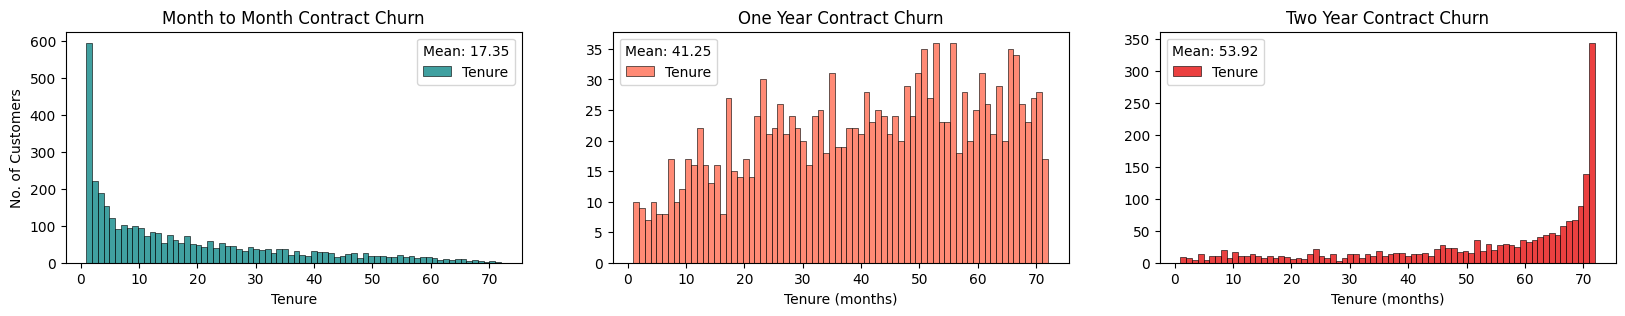

In [77]:
two_year_mean = round(telco[telco['Contract'] == 2]['Tenure in Months'].mean(), 2)
month_mean = round(telco[telco['Contract'] == 0]['Tenure in Months'].mean(), 2)
year_mean = round(telco[telco['Contract'] == 1]['Tenure in Months'].mean(), 2)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 3))

plt.subplot(1, 3, 1)
ax = sns.histplot(telco[telco['Contract'] == 0]['Tenure in Months'], bins=72, color='#008080')
ax.legend(['Tenure'], loc='upper right', title=f'Mean: {month_mean}')
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Month to Month Contract Churn')

plt.subplot(1, 3, 2)
ax = sns.histplot(telco[telco['Contract'] == 1]['Tenure in Months'], bins=72, color='#FF6347')
ax.legend(['Tenure'], loc='upper left', title=f'Mean: {year_mean}')
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract Churn')

plt.subplot(1, 3, 3)
ax = sns.histplot(telco[telco['Contract'] == 2]['Tenure in Months'], bins=72, color='#E50000')
ax.legend(['Tenure'], loc='upper left', title=f'Mean: {two_year_mean}')
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract Churn')

plt.show()


**Conclusions**

1. Many customers tend to churn after just one month of service, indicating a high churn rate among new customers.

2. A significant number of customers have remained with the service provider for 72 weeks, indicating a group of long-term, loyal customers.

3. The analysis suggests that customers with longer-term contracts tend to have a longer tenure with the service provider, as evidenced by the higher mean tenure scores for customers with one-year and two-year contracts. This indicates that longer contract durations may contribute to customer retention.

### Categorical Columns

In [78]:
telco.columns

Index(['Customer ID', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Population', 'Churn Value', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported'],
      dtype='object')

### Customer info

Observing the categorical columns related to the customer info

In [79]:
customer_related_columns = ['Senior Citizen', 'Married', 'Dependents', 'Gender']

In [80]:
telco.head()

,Customer ID,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,8779-QRDMV,0,1,None,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,0,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,5,0
1,7495-OOKFY,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,0,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,5,0
2,1658-BYGOY,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,0,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,1,0
3,4598-XLKNJ,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,0,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,1,1
4,4846-WHAFZ,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,0,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,1,0


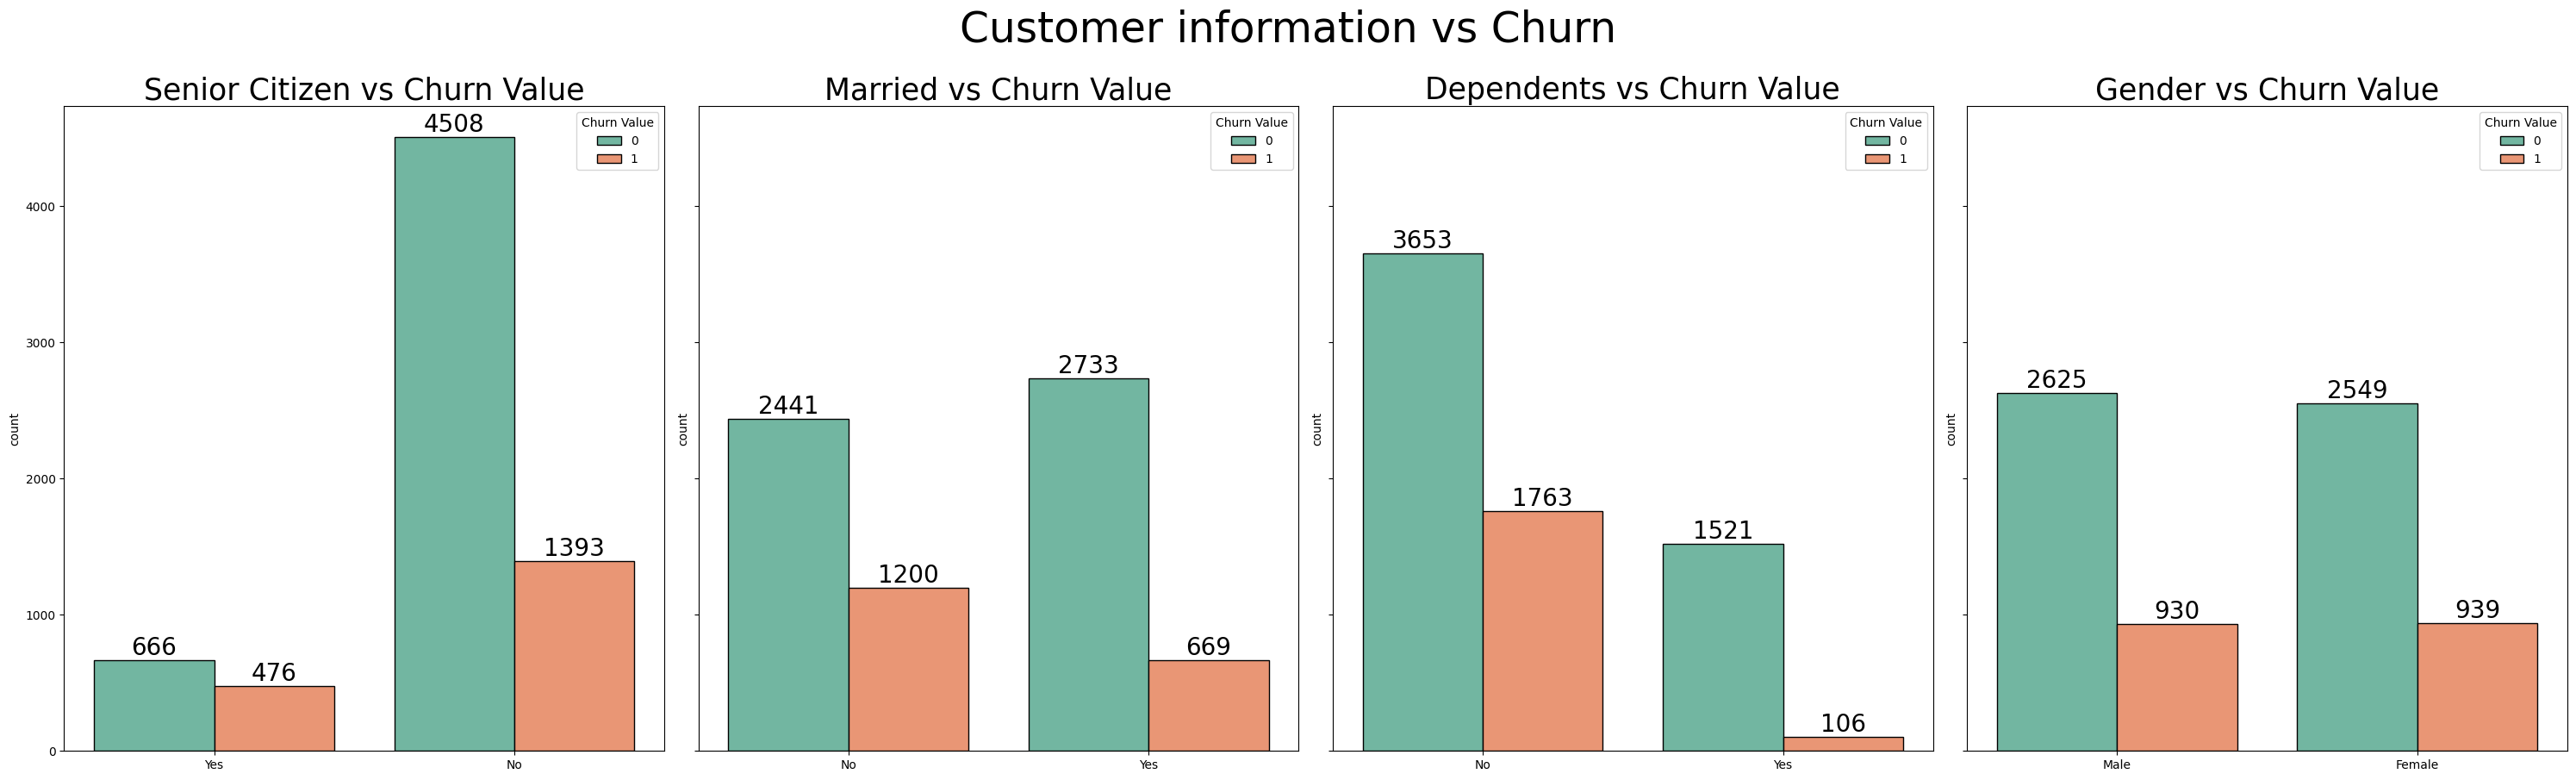

In [81]:
hue = "Churn Value"
figsize = (30, 9)
palette = "Set2"

# Definición de la función para los gráficos de conteo
def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle, y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax = sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue=hue, palette=palette, edgecolor='black')
        axs[i].set_title(data + f' vs {hue}', size=25)
        for container in ax.containers:
            ax.bar_label(container, size=20)
            ax.set_xlabel('')

countplots_custom(dataset=telco, columns_list=customer_related_columns, rows=1, cols=4, figsize=figsize, hue=hue, palette=palette, suptitle='Customer information vs Churn')
plt.tight_layout()

From the histograms we can conclude that the relation between gender and Churn Value is small therefore is not relevant for our prediction whereas the other variables seem to explain why clients are churning 

### Services

In [82]:
provided_services_columns = [
    'Phone Service', 'Internet Service', 'Internet Type', 
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
    'Streaming Music', 'Unlimited Data'
]


In [83]:
telco.head()

,Customer ID,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,8779-QRDMV,0,1,None,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,0,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,5,0
1,7495-OOKFY,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,0,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,5,0
2,1658-BYGOY,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,0,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,1,0
3,4598-XLKNJ,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,0,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,1,1
4,4846-WHAFZ,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,0,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,1,0


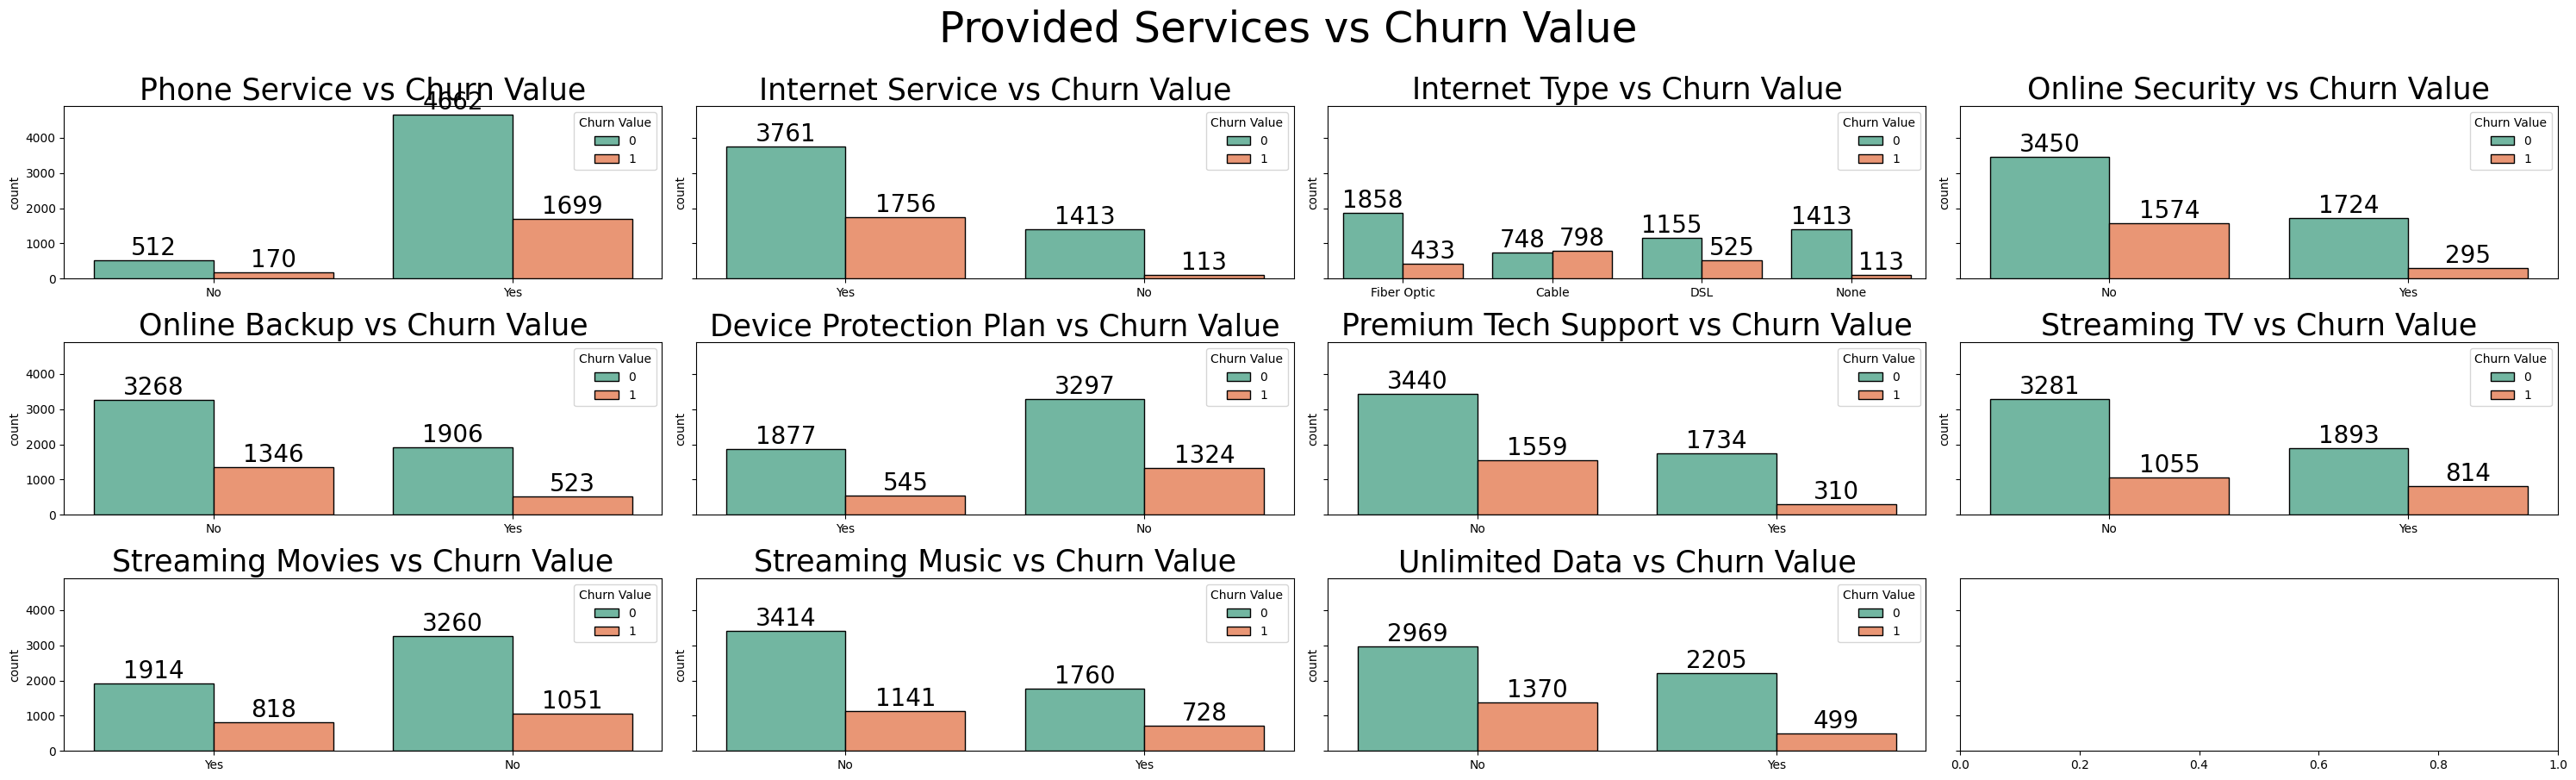

In [84]:
hue = "Churn Value"
figsize = (30, 9)
palette = "Set2"

# Definición de la función para los gráficos de conteo
def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle, y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax = sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue=hue, palette=palette, edgecolor='black')
        axs[i].set_title(data + f' vs {hue}', size=25)
        for container in ax.containers:
            ax.bar_label(container, size=20)
            ax.set_xlabel('')

countplots_custom(dataset=telco, columns_list=provided_services_columns, rows=3, cols=4, figsize=figsize, hue=hue, palette=palette, suptitle='Provided Services vs Churn Value')
plt.tight_layout()


**Conclusions**

1. **Internet Service Conclusion:**
   - Customers who subscribe to Fiber for internet service have a significantly higher churn rate.
   - In contrast, customers using DSL internet service tend to have lower churn rates.
   - Customers without any internet service exhibit a notably low churn rate, suggesting they are less likely to churn.

2. **Support Services Conclusion:**
   - Customers who do not subscribe to support services such as Online Security, Online Backup, Device Protection Plan, Premium Tech Support are more prone to churning.
   

### Type of Payment

In [85]:
contract_mapping_reverse = {v: k for k, v in contract_mapping.items()}
telco['Contract'] = telco['Contract'].map(contract_mapping_reverse)


In [86]:
payment_columns = [
    'Payment Method',
    'Contract',
    'Paperless Billing'
]


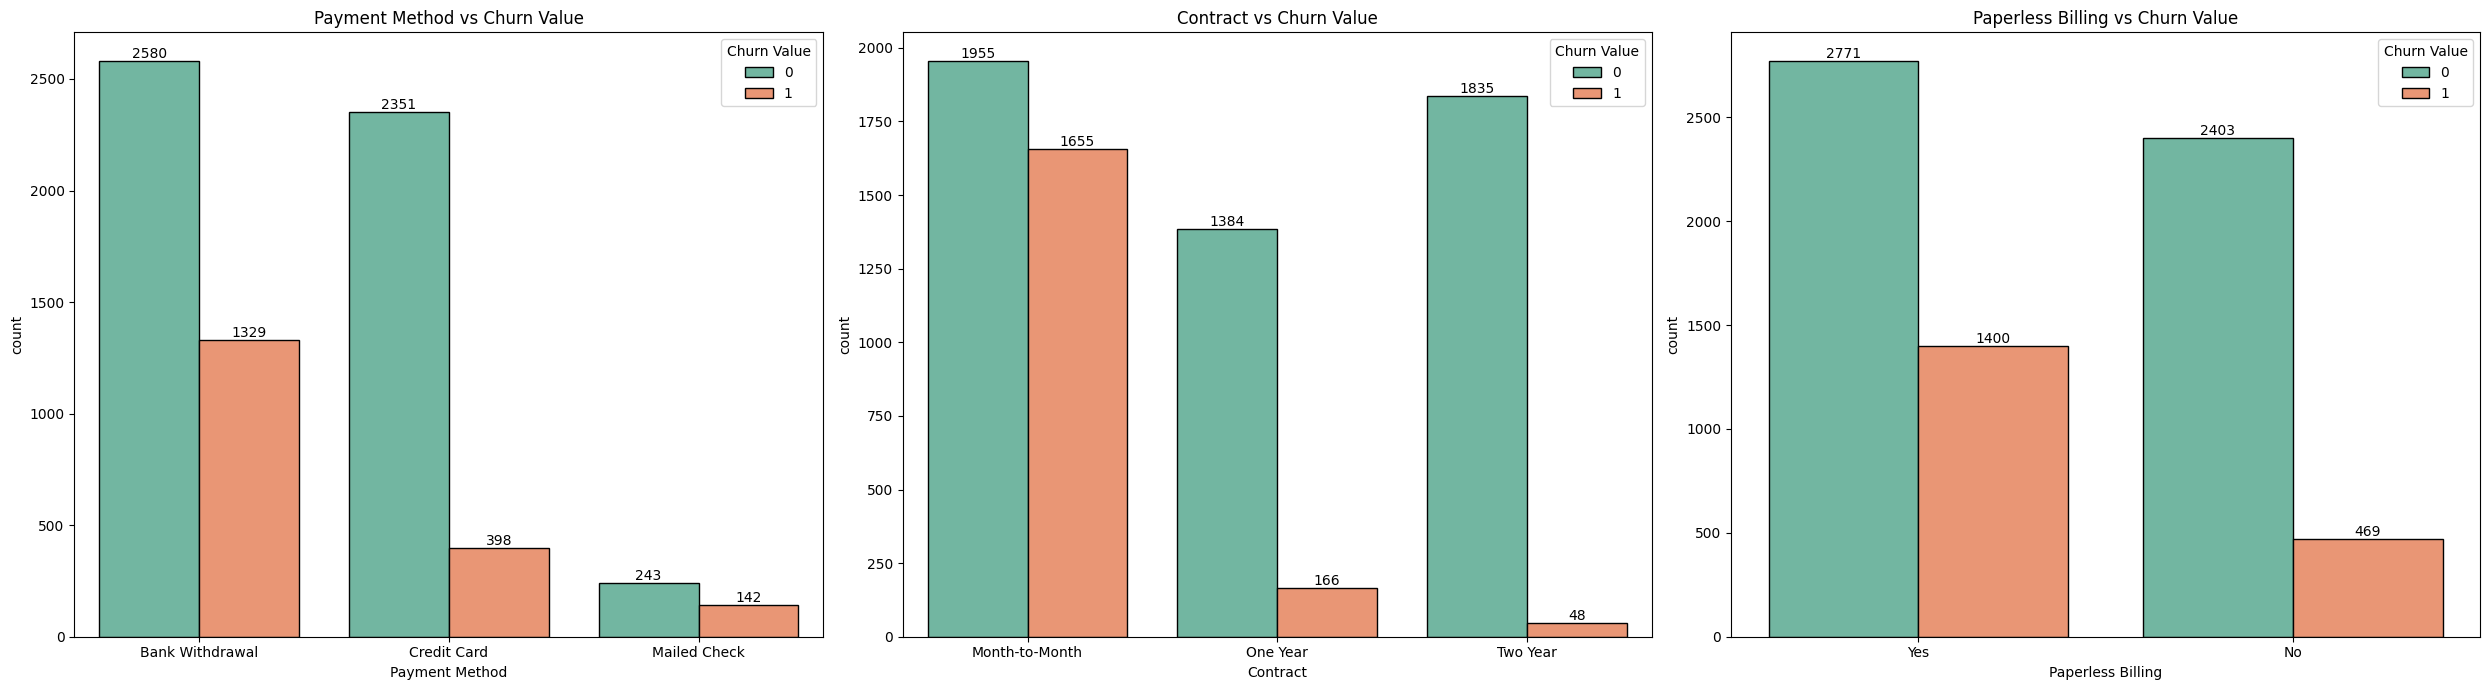

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definición de la función para los gráficos de conteo
# Definición de la función para los gráficos de conteo
def countplots_custom(dataset, columns_list, figsize, palette):
    fig, axs = plt.subplots(1, len(columns_list), figsize=figsize)
    for i, column in enumerate(columns_list):
        ax = sns.countplot(data=dataset, x=column, hue="Churn Value", palette=palette, edgecolor='black', ax=axs[i])
        ax.legend(loc='upper right', title='Churn Value')
        for container in ax.containers:
            ax.bar_label(container)
        title = f'{column} vs Churn Value'
        ax.set_title(title)


# Definición de paleta de colores
palette2 = "Set2"

# Lista de columnas
payment_columns = ['Payment Method', 'Contract', 'Paperless Billing']

# Tamaño de la figura
figsize = (25, 7)

# Llamada a la función para crear los gráficos
countplots_custom(dataset=telco, columns_list=payment_columns, figsize=figsize, palette=palette2)

plt.tight_layout()
plt.show()


**Offer**

1. **Contract Duration**: Customers with short-term contracts, particularly "Month-to-Month," exhibit significantly higher churn rates. The flexibility of shorter contracts may lead to more frequent customer turnover.

2. **Paperless Billing**: Customers who opt for paperless billing are more likely to churn compared to those who receive physical bills. This shift towards digital billing methods could be associated with a higher churn rate.

3. **Payment Method**: Customers who choose bank withdrawals as their payment method are notably more prone to churn. The reasons behind this trend warrant further investigation, but it's clear that the choice of payment method can impact churn rates.

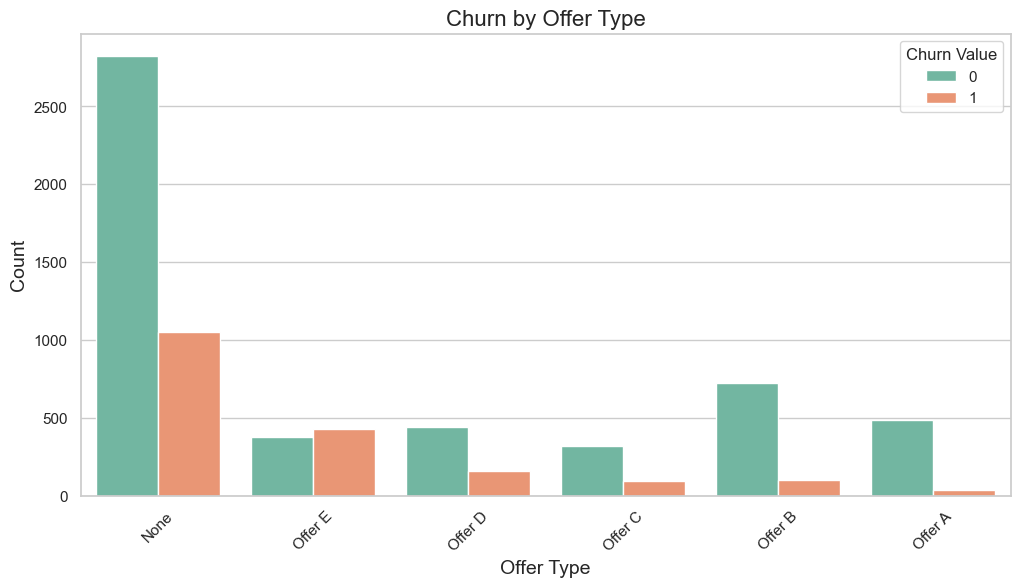

In [88]:
# Define the size of the plot
plt.figure(figsize=(12, 6))

# Create a countplot for the "Offer" column
sns.set(style="whitegrid")
sns.countplot(data=telco, x="Offer", hue="Churn Value", palette="Set2")

# Customize the plot
plt.title("Churn by Offer Type", fontsize=16)
plt.xlabel("Offer Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Data Prepraration for Modeling

- Transforming binary features Yes/No to [0,1]
- Standarization of numerical variables 
- " Dummy " transformation of categorical features
- Testing different models 

### Selecting key features

## Model 1: Logistic Regression